# Timeseries' of all variables nomask 

Time series from ACCESS-ESM1.5. The data shown is ensamble means with shaded area being the standard deviation generated from the global (spatial) mean and yearly (temporal) mean of 40 realizations per scenario.

The subfigures hold timeseries of; a) tas, b) txxETCCDI, c) pr, d) rx5dayETCCDI, e) gslETCCDI and f) fdETCCDI.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from xclim import ensembles
from pathlib import Path
import matplotlib.ticker as ticker

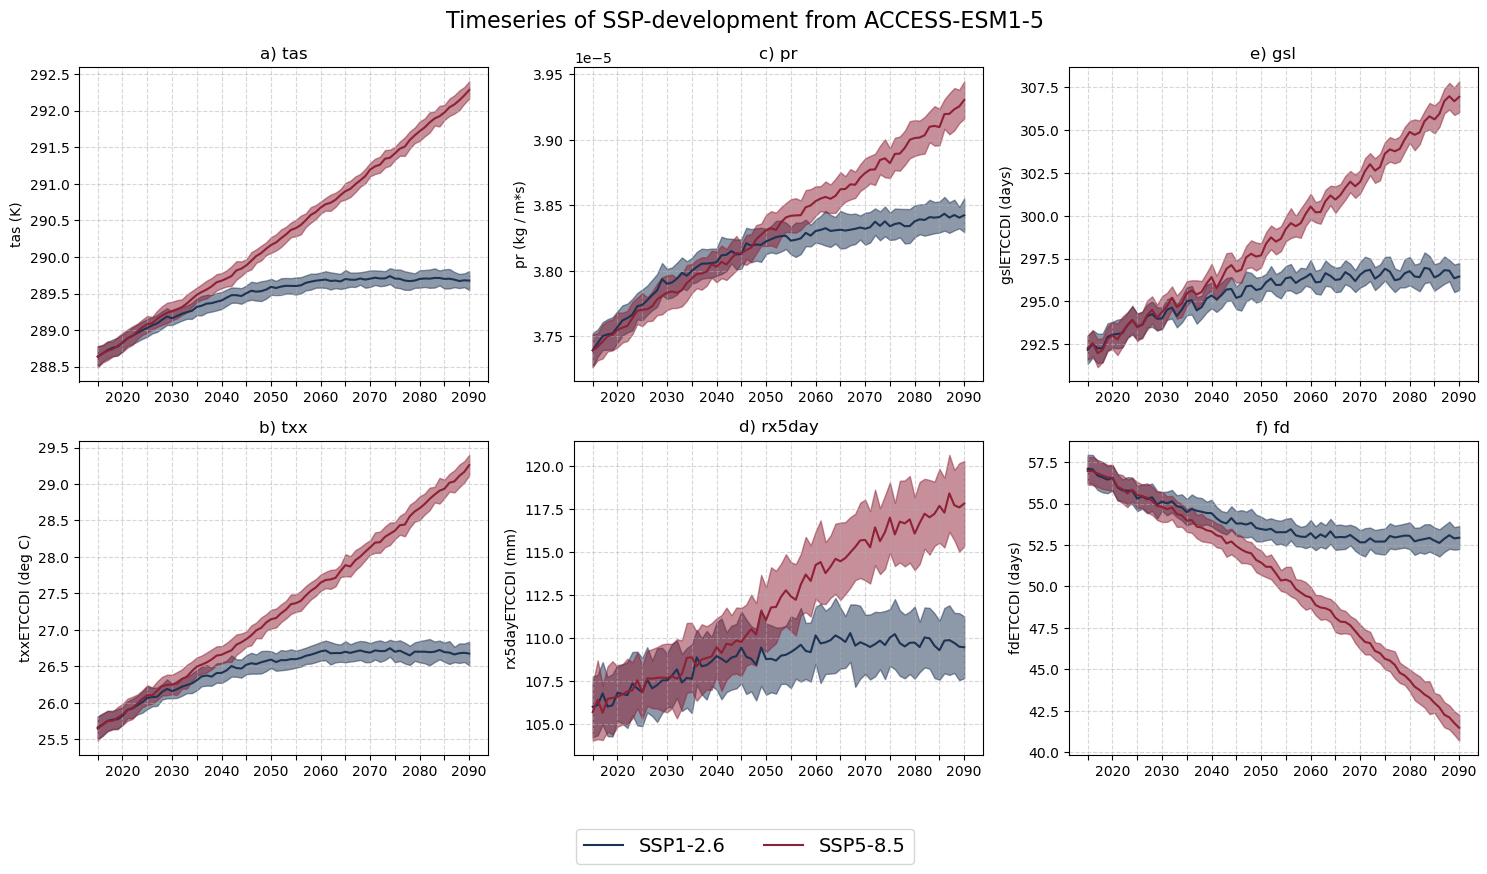

In [3]:
num_rows = 2
num_cols = 3
variables = {'tas': {'unit': 'K', 'subplot': 'a)'}, 
             'pr': {'unit': 'kg / m*s', 'subplot': 'c)'}, 
             'gslETCCDI': {'unit': 'days', 'subplot': 'e)'},
             'txxETCCDI': {'unit': 'deg C', 'subplot': 'b)'},
             'rx5dayETCCDI': {'unit': 'mm', 'subplot': 'd)'},     
             'fdETCCDI': {'unit': 'days', 'subplot': 'f)'}}

temporal_range = (2015, 2090)
SSPs = ['ssp126','ssp585']
color_map = {'ssp126': '#1c3354', 
             'ssp245': '#ebdf4a', 
             'ssp370': '#f43030', 
             'ssp585': '#8f2035'}
label_map = {'ssp126': 'SSP1-2.6', 
             'ssp245': 'SSP2-4.5', 
             'ssp370': 'SSP3-7.0', 
             'ssp585': 'SSP5-8.5'}
label_map_variables = {'tas': 'tas',
                       'pr': 'pr',
                       'gslETCCDI': 'gsl',
                       'txxETCCDI': 'txx',
                       'rx5dayETCCDI': 'rx5day',
                       'fdETCCDI': 'fd'}


main_data_dir = 'D:/Programmering/msc/MSc_DataFiles_040424/AnnualGlobalClimatologies/nomask'

fig, axs = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 4*num_rows))
axs = axs.flatten()

fig.suptitle('Timeseries of SSP-development from ACCESS-ESM1-5', fontsize=16)



for i, (variable, info_dict) in enumerate(variables.items()):
    ax = axs[i]
    ax.grid(True, linestyle='--', alpha=0.5, zorder=0)
    ax.set_ylabel(f'{variable} ({info_dict["unit"]})')
    ax.set_title(f'{info_dict["subplot"]} {label_map_variables[variable]}')

    for scenario in SSPs:
        data_dir = '/'.join([main_data_dir, variable, scenario])
        ens = ensembles.create_ensemble(Path(data_dir).glob("*.nc"))
        
        if temporal_range is not None and type(temporal_range) is tuple and len(temporal_range) == 2:
            start_slice = str(temporal_range[0])
            end_slice = str(temporal_range[1])
            ens = ens.sel(year=slice(start_slice, end_slice))
        
        ens_stats = ensembles.ensemble_mean_std_max_min(ens)
        
        ens_mean = ens_stats[f'{variable}_mean']
        ens_std = ens_stats[f'{variable}_stdev']
        ax.plot(ens_stats.year, ens_mean, 
                        label=label_map[scenario],
                        color=color_map[scenario])
        ax.fill_between(ens_stats.year, ens_mean - ens_std, ens_mean + ens_std, 
                        color=color_map[scenario],
                        alpha=0.5)
    
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: int(x) if int(x) % 10 == 0 else ''))


handles, labels = fig.axes[0].get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
fig.legend(
    *zip(*unique), 
    loc='lower center', 
    bbox_to_anchor=(0.5, -0.1), 
    ncol=len(SSPs), 
    fontsize=14)

plt.tight_layout()
plt.show()

# The tas-pr feature space for 2015 and 2040

In [2]:
from src.helperfunctions_ML import open_cross_sections
import pandas as pd

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
cross_sections = open_cross_sections()
cross_sections[2015]

plot_data = pd.DataFrame(columns=['year', 'scenario', 'tas', 'pr'])

for year in [2021, 2040]:
    
    year_data = cross_sections[year]

    var_map = {'tas: nomask': 'tas', 'pr: nomask': 'pr'}

    year_plot_data = year_data[['tas: nomask', 'pr: nomask', 'scenario']]
    year_plot_data.rename(columns=var_map, inplace=True)
    year_plot_data['year'] = year
    color_map = {'ssp126': '#1c3354', 
                 'ssp585': '#8f2035'}
    year_plot_data['color'] = year_plot_data['scenario'].map(color_map)

    plot_data = pd.concat([plot_data, year_plot_data])
    
label_map = {'ssp126': 'SSP1-2.6', 
             'ssp585': 'SSP5-8.5'}
plot_data['scenario'] = plot_data['scenario'].map(label_map)

plot_data

C:\Users\fjejo\AppData\Local\Temp\ipykernel_65000\3238770611.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_plot_data.rename(columns=var_map, inplace=True)
C:\Users\fjejo\AppData\Local\Temp\ipykernel_65000\3238770611.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_plot_data['year'] = year
C:\Users\fjejo\AppData\Local\Temp\ipykernel_65000\3238770611.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,year,scenario,tas,pr,color
0,2021,SSP1-2.6,289.093463,0.000038,#1c3354
1,2021,SSP1-2.6,289.037001,0.000038,#1c3354
2,2021,SSP1-2.6,288.787616,0.000038,#1c3354
3,2021,SSP1-2.6,288.635239,0.000037,#1c3354
4,2021,SSP1-2.6,288.929572,0.000038,#1c3354
...,...,...,...,...,...
155,2040,SSP5-8.5,289.613859,0.000038,#8f2035
156,2040,SSP5-8.5,289.891620,0.000038,#8f2035
157,2040,SSP5-8.5,289.746824,0.000038,#8f2035
158,2040,SSP5-8.5,289.634331,0.000038,#8f2035


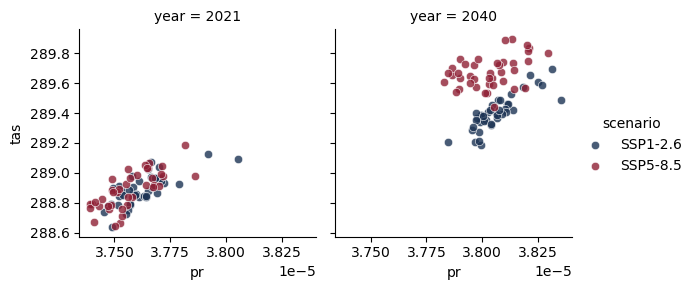

In [ ]:
import seaborn as sns
color_map = {'SSP1-2.6': '#1c3354', 
             'SSP5-8.5': '#8f2035'}

g = sns.FacetGrid(data=plot_data, col='year', hue='scenario', palette=color_map)
g.map_dataframe(sns.scatterplot, x='pr', y='tas', alpha=.8)
g.add_legend()

# Globe plot for theory

In [2]:
from src.plotting import plot_on_map
import cartopy.crs as ccrs
from xclim import ensembles
from pathlib import Path
import cmocean

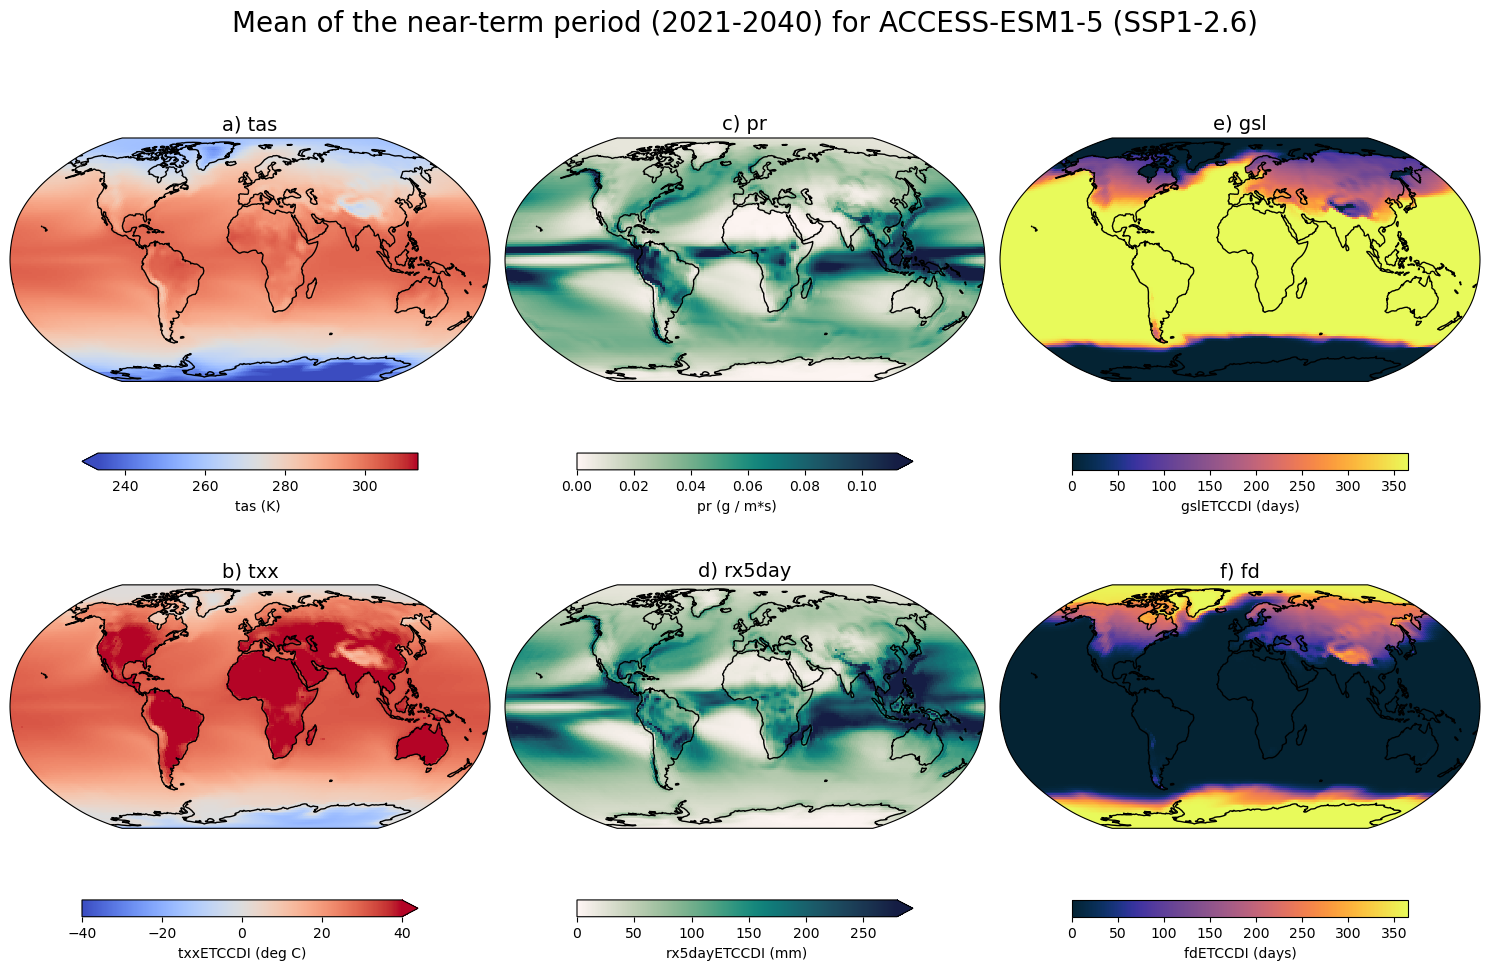

In [3]:
num_rows = 2
num_cols = 3

main_data_dir = 'D:/Programmering/msc/MSc_DataFiles_040424/Annualclimatologies/nomask'

variables = {'tas': {'unit': 'K', 'subplot': 'a)'}, 
             'pr': {'unit': 'g / m*s', 'subplot': 'c)'},
             'gslETCCDI': {'unit': 'days', 'subplot': 'e)'},
             'txxETCCDI': {'unit': 'deg C', 'subplot': 'b)'},
             'rx5dayETCCDI': {'unit': 'mm', 'subplot': 'd)'},
             'fdETCCDI': {'unit': 'days', 'subplot': 'f)'}}
temporal_range = (2015, 2090)
SSPs = ['ssp126']
color_map = {'ssp126': '#1c3354', 
             'ssp245': '#ebdf4a', 
             'ssp370': '#f43030', 
             'ssp585': '#8f2035'}
label_map = {'ssp126': 'SSP1-2.6', 
             'ssp245': 'SSP2-4.5', 
             'ssp370': 'SSP3-7.0', 
             'ssp585': 'SSP5-8.5'}
label_map_variables = {'tas': 'tas',
                       'pr': 'pr',
                       'gslETCCDI': 'gsl',
                       'txxETCCDI': 'txx',
                       'rx5dayETCCDI': 'rx5day',
                       'fdETCCDI': 'fd'}


fig, axs = plt.subplots(
    ncols=num_cols, nrows=num_rows, 
    figsize=(5*num_cols, 5*num_rows),
    subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0), facecolor="gray")
)
axs = axs.flatten()

fig.suptitle('Mean of the near-term period (2021-2040) for ACCESS-ESM1-5 (SSP1-2.6)', fontsize=20)

i = 0
for var, info_dict in variables.items():
    cmap_kwargs = {}
    if var == 'tas':
        cmap_kwargs['temperature'] = 'abs'
        cmap_kwargs['v_min'] = 273.15 - 40
        cmap_kwargs['v_max'] = 273.15 + 40
    elif var == 'txxETCCDI':
        cmap_kwargs['temperature'] = 'abs'
        cmap_kwargs['v_min'] = -40
        cmap_kwargs['v_max'] = 40
    elif var in ['pr', 'rx5dayETCCDI']:
        cmap_kwargs['percipitation'] = 'abs'
        cmap_kwargs['v_min'] = 0
    elif var in ['gslETCCDI', 'fdETCCDI']:
        cmap_kwargs['v_min'] = 0
        cmap_kwargs['cmap'] = cmocean.cm.thermal

    for scenario in SSPs:
        data_dir = '/'.join([main_data_dir, var, scenario])
        ens = ensembles.create_ensemble(Path(data_dir).glob("*.nc")) 
        ensamble_mean = ens.mean(dim='realization') 
        ensamble_mean = ensamble_mean.rename({var: f'{var} ({info_dict["unit"]})'})
        
        plot_data = ensamble_mean.sel(year=slice(2021, 2040)).mean(dim='year')[f'{var} ({info_dict["unit"]})']
        plot_data = plot_data if var != 'pr' else plot_data * 1000

        plot_on_map(
            plot_data, 
            ax=axs[i], 
            title=f'{info_dict["subplot"]} {label_map_variables[var]}', 
            **cmap_kwargs
        )

        i += 1

plt.tight_layout()
plt.show()

# display masks 

In [6]:
import os
import xarray as xr
from src.plotting import plot_on_map
from src.preproces import Handle_Files

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import regionmask

file_handler = Handle_Files()


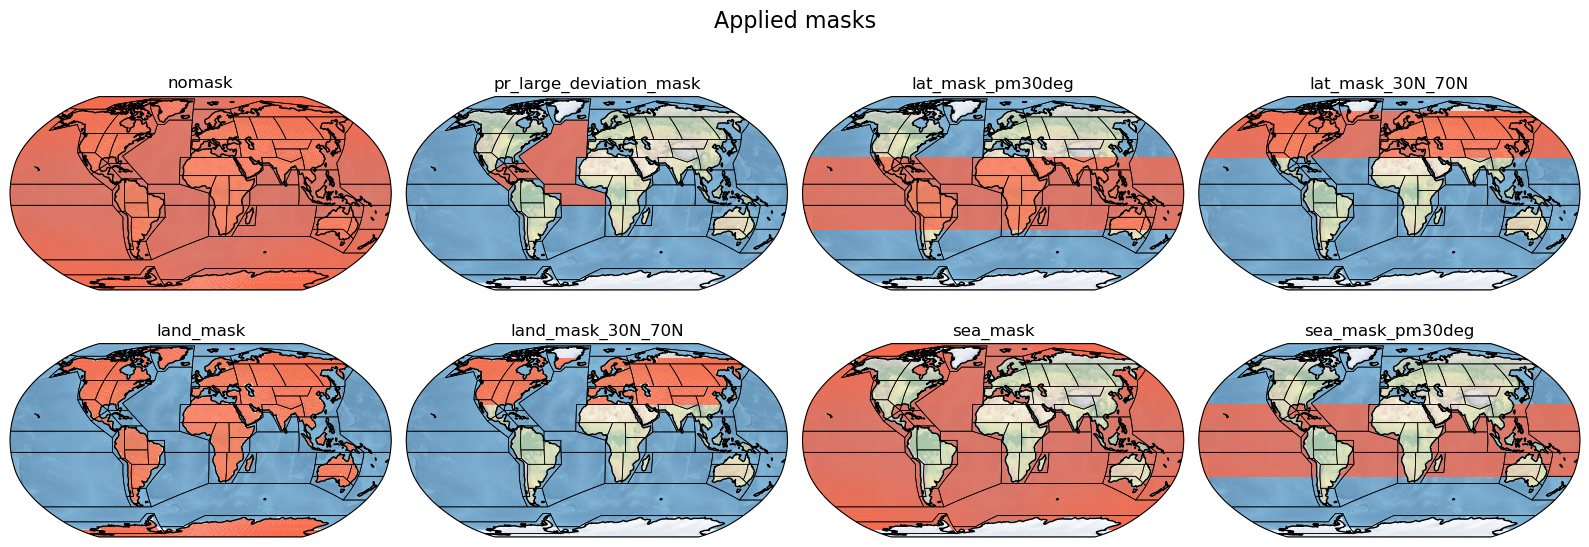

In [22]:
import numpy as np

file_paths = {
    'nomask': {'path': '\\nomask\\fdETCCDI\ssp126\\fdETCCDI_yr_ACCESS-ESM1-5_ssp126_r1i1p1f1_2015-2100.nc', 'var': 'fdETCCDI'},
    'pr_large_deviation_mask': {'path': 'pr_large_deviation_mask\pr\ssp126\pr_yr_ACCESS-ESM1-5_ssp126_r1i1p1f1_gn_2015-2100_pr_large_deviation_mask.nc', 'var': 'pr'},
    'lat_mask_pm30deg': {'path': 'lat_mask_pm30deg\\rx5dayETCCDI\ssp126\\rx5dayETCCDI_yr_ACCESS-ESM1-5_ssp126_r1i1p1f1_2015-2100_lat_mask_pm30deg.nc', 'var': 'rx5dayETCCDI'},
    'lat_mask_30N_70N': {'path': 'lat_mask_30N_70N\\fdETCCDI\ssp126\\fdETCCDI_yr_ACCESS-ESM1-5_ssp126_r1i1p1f1_2015-2100_lat_mask_30N_70N.nc', 'var': 'fdETCCDI'},
    'land_mask':  {'path': 'land_mask\pr\ssp126\pr_yr_ACCESS-ESM1-5_ssp126_r1i1p1f1_gn_2015-2100_land_mask.nc', 'var': 'pr'},
    'land_mask_30N_70N': {'path': 'land_mask_30N_70N\\fdETCCDI\ssp126\\fdETCCDI_yr_ACCESS-ESM1-5_ssp126_r1i1p1f1_2015-2100_land_mask_30N_70N.nc', 'var': 'fdETCCDI'},
    'sea_mask': {'path': 'sea_mask\pr\ssp126\pr_yr_ACCESS-ESM1-5_ssp126_r1i1p1f1_gn_2015-2100_sea_mask.nc', 'var': 'pr'},
    'sea_mask_pm30deg': {'path': 'sea_mask_pm30deg\pr\ssp126\pr_yr_ACCESS-ESM1-5_ssp126_r1i1p1f1_gn_2015-2100_sea_mask_pm30deg.nc', 'var': 'pr'},
    }
main_data_dir = 'D:\Programmering\msc\MSc_DataFiles_040424\Annualclimatologies'

num_rows = 2
num_cols = 4

fig, axs = plt.subplots(
    ncols=num_cols, nrows=num_rows, 
    figsize=(4*num_cols, 3*num_rows),
    subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0), facecolor="gray")
    )
axs = axs.flatten()

fig.suptitle('Applied masks', fontsize=16)

for i, (mask, path_dict) in enumerate(file_paths.items()):
    
    ax = axs[i]

    file_path = '\\'.join([main_data_dir, path_dict['path']])
    test_file = file_handler.read_netcdf_to_xr(file_path)

    plot_data = test_file.isel(year=0)[path_dict['var']]
    plot_data = plot_data.where(plot_data.isnull(), 1)

    p = plot_data.plot.pcolormesh(
        x='lon', 
        y='lat', 
        ax=ax, 
        transform=ccrs.PlateCarree(), 
        add_colorbar=False, 
        alpha=0.75, 
        cmap='Reds'
        )
    
    regionmask.defined_regions.ar6.all.plot(
        ax=p.axes, 
        add_label=False, 
        line_kws=dict(linewidth=0.5, color='black')
        )
    p.axes.set_global()
    p.axes.coastlines()
    p.axes.stock_img()
    p.axes.set_title(mask)

plt.tight_layout()
plt.show()


# Example masked time series

In [1]:
from src.plotting import plot_annual_global_ensambles

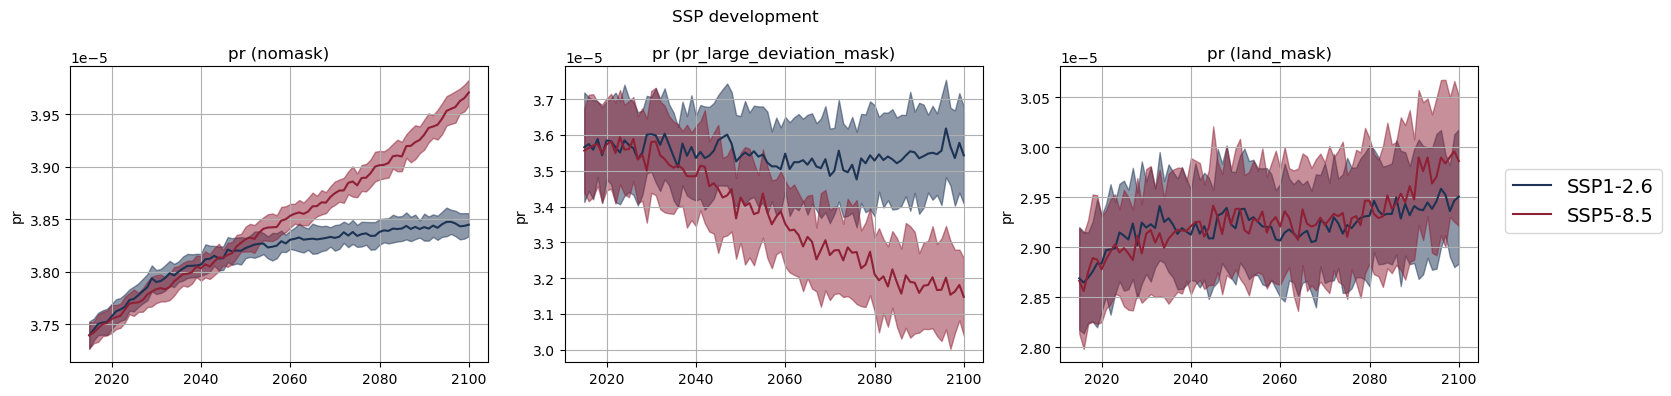

In [2]:
main_data_dir = 'D:/Programmering/msc/MSc_DataFiles_040424/AnnualGlobalClimatologies'

plot_annual_global_ensambles(main_data_dir, 
                             ['ssp126', 'ssp585'],
                             'pr',
                             ['nomask', 'pr_large_deviation_mask', 'land_mask'], 
                             show_fig2=False,
                            )

# Logitstic regression sample

In [10]:
scenario_indx_key = {'SSP1-2.6': 0, 'SSP5-8.5': 1}
plot_data['scenario_indx'] = plot_data['scenario'].map(scenario_indx_key)
log_plot_data = plot_data[plot_data['year']==2040][['scenario', 'scenario_indx', 'tas','color']] # plot data from cross section fig
log_plot_data['tas'] = (log_plot_data['tas'] - log_plot_data['tas'].mean()) / .01

In [11]:
log_plot_data

,scenario,scenario_indx,tas,color
0,SSP1-2.6,0,-20.061691,#1c3354
1,SSP1-2.6,0,-14.118928,#1c3354
2,SSP1-2.6,0,-15.680940,#1c3354
3,SSP1-2.6,0,-12.112477,#1c3354
4,SSP1-2.6,0,-1.271871,#1c3354
...,...,...,...,...
155,SSP5-8.5,1,7.423734,#8f2035
156,SSP5-8.5,1,35.199913,#8f2035
157,SSP5-8.5,1,20.720267,#8f2035
158,SSP5-8.5,1,9.470973,#8f2035


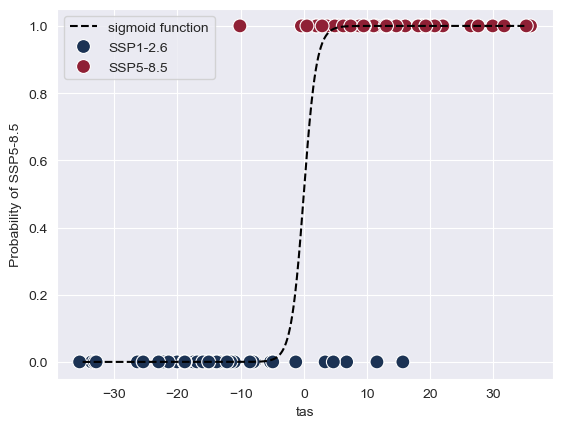

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

color_map = {'SSP1-2.6': '#1c3354', 
             'SSP5-8.5': '#8f2035'}
fig, ax = plt.subplots()

z = np.arange(-35, 35, .1)
sigma_fn = np.vectorize(lambda z: 1/(1+np.exp(-z)))
sigma = sigma_fn(z)
ax.plot(
    z, sigma,
    color='black',
    lw=1.5,
    ls='dashed',
    label='sigmoid function'
)
sns.set_style("darkgrid")
sns.scatterplot(
    log_plot_data, 
    ax=ax, 
    x='tas',
    y='scenario_indx', 
    hue='scenario', 
    palette=color_map,
    s=100,
)




ax.set_xlabel('tas')
ax.set_ylabel('Probability of SSP5-8.5')


plt.legend()
plt.savefig("sigmoid.png")
plt.show()
